# Proyecto 2

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
import xgboost as xgb

## Exploracion

In [2]:
df = pd.read_csv("train_dataset.csv")
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [65]:
df.smoking.value_counts()

0    24666
1    14318
Name: smoking, dtype: int64

## Preparacion

In [11]:
X = df.drop('smoking', axis=1)
y = df['smoking']

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelo

In [27]:
nn_model = Sequential()

nn_model.add(Dense(15, input_shape=(X_train.shape[1],), activation='relu'))
nn_model.add(Dense(10, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='aucroc')])

history = nn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val)
)

Epoch 1/100
244/244 [==============================] - 3s 5ms/step - loss: 2.8908 - aucroc: 0.5799 - val_loss: 0.9657 - val_aucroc: 0.6798
Epoch 2/100
244/244 [==============================] - 1s 3ms/step - loss: 0.7720 - aucroc: 0.6891 - val_loss: 0.6756 - val_aucroc: 0.7130
Epoch 3/100
244/244 [==============================] - 1s 3ms/step - loss: 0.6419 - aucroc: 0.7230 - val_loss: 0.6129 - val_aucroc: 0.7277
Epoch 4/100
244/244 [==============================] - 1s 5ms/step - loss: 0.6112 - aucroc: 0.7316 - val_loss: 0.6074 - val_aucroc: 0.7455
Epoch 5/100
244/244 [==============================] - 1s 4ms/step - loss: 0.5856 - aucroc: 0.7449 - val_loss: 0.5807 - val_aucroc: 0.7536
Epoch 6/100
244/244 [==============================] - 1s 4ms/step - loss: 0.5779 - aucroc: 0.7499 - val_loss: 0.5713 - val_aucroc: 0.7565
Epoch 7/100
244/244 [==============================] - 1s 3ms/step - loss: 0.5712 - aucroc: 0.7549 - val_loss: 0.5789 - val_aucroc: 0.7616
Epoch 8/100
244/244 [======

In [45]:
y_probs = nn_model.predict(X_val)
y_pred = (y_probs > 0.48).astype(int)
print(classification_report(y_val, y_pred, zero_division=np.nan))

NameError: name 'nn_model' is not defined

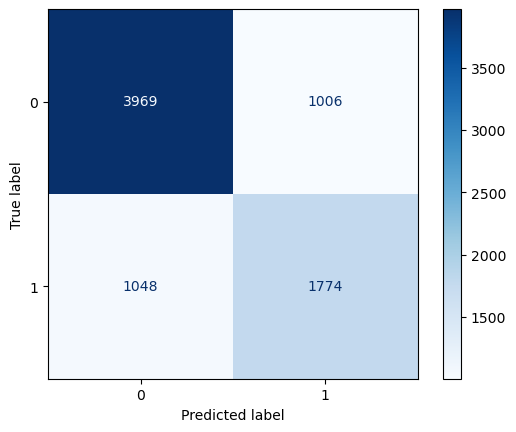

In [42]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, cmap='Blues')
plt.show()

In [43]:
X_train['prob_1_nn'] = nn_model.predict(X_train)
X_val['prob_1_nn'] = y_probs

975/975 [==============================] - 2s 2ms/step


In [44]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
y_pred = xgb_model.predict(X_val)
print(classification_report(y_val, y_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4975
           1       0.66      0.68      0.67      2822

    accuracy                           0.76      7797
   macro avg       0.74      0.74      0.74      7797
weighted avg       0.76      0.76      0.76      7797



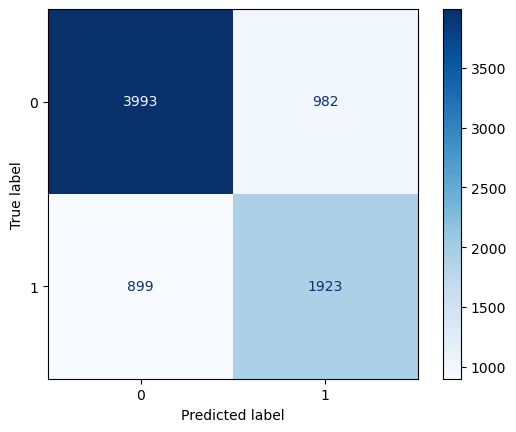

In [47]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, cmap='Blues')
plt.show()

Neural Network
- learning rate: 10 ^ uniform(-3.3, -1)
- epochs: randint(7, 20)
- batch size: choice(32, 64, 128, 256)
- nodos capa 1: randint(7,22) 
- nodos capa 2: randint(3,17) 
- activacion capa 1: choice(relu, sigmoid, leaky_relu, tanh) 50% relu
- activacion capa 2: choice(relu, sigmoid, leaky_relu, tanh) 50% relu
- regularizacion capa 1: choice(0.1, 0.01, 0.001, 0.0001, 0)
- regularizacion capa 2: choice(0.1, 0.01, 0.001, 0.0001, 0)
- classes weights: choice(si, no)

XGBoost
- learning rate: uniform(0.01, 0.3)
- max bins: uniform(70, 200)
- min instances: uniform(20, 1000)
- max depth: randint(7, 20)
- num trees: (15, 150)
- scale pos weight: choice(1, 1.2, 1.5, 1.72)

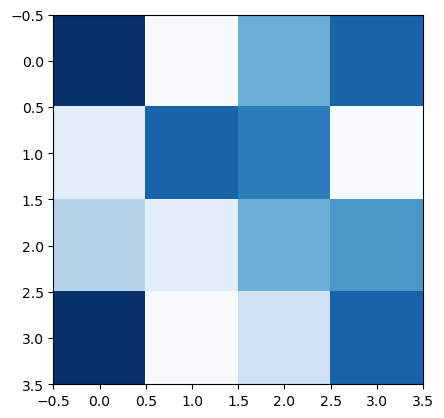

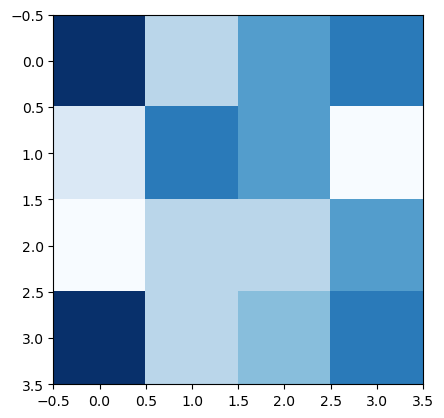

In [70]:
plt.imshow([[1, 0, 0.5, 0.8], [0.1, 0.8, 0.7, 0], [0.3, 0.1, 0.5, 0.6], [1, 0, 0.2, 0.8]], cmap='Blues')
plt.show()
plt.imshow([[1, 0.5, 0.7, 0.8], [0.4, 0.8, 0.7, 0.3], [0.3, 0.5, 0.5, 0.7], [1, 0.5, 0.6, 0.8]], cmap='Blues')
plt.show()